In [1]:
import xarray as xa
from matplotlib import pyplot as plt
import cartopy

In [2]:
ERA_map = xa.open_dataset('map_ERA5_gulftrans.nc')
print(ERA_map)

<xarray.Dataset>
Dimensions:        (dst_grid_rank: 2, n_a: 1038240, n_b: 640, n_s: 3259, nv_a: 4, nv_b: 4, src_grid_rank: 2)
Dimensions without coordinates: dst_grid_rank, n_a, n_b, n_s, nv_a, nv_b, src_grid_rank
Data variables: (12/17)
    src_grid_dims  (src_grid_rank) int32 ...
    dst_grid_dims  (dst_grid_rank) int32 ...
    yc_a           (n_a) float64 ...
    yc_b           (n_b) float64 ...
    xc_a           (n_a) float64 ...
    xc_b           (n_b) float64 ...
    ...             ...
    area_b         (n_b) float64 ...
    frac_a         (n_a) float64 ...
    frac_b         (n_b) float64 ...
    row            (n_s) int32 ...
    col            (n_s) int32 ...
    S              (n_s) float64 ...
Attributes: (12/15)
    Title:          TempestRemap Offline Regridding Weight Generator
    bubble:         true
    concave_dst:    false
    concave_src:    false
    domain_a:       ERA5.g
    domain_b:       gulftrans.g
    ...             ...
    mono_type:      0
    np_dst:

In [19]:
ERA_map.yv_b

<xarray.DataArray 'yv_b' (n_b: 640, nv_b: 4)>
array([[19.807369, 19.946447, 20.15407 , 20.014791],
       [19.946447, 20.085252, 20.293072, 20.15407 ],
       [20.085252, 20.22378 , 20.431797, 20.293072],
       ...,
       [33.611732, 33.76508 , 33.962431, 33.808739],
       [33.76508 , 33.917973, 34.115666, 33.962431],
       [33.917973, 34.070406, 34.268439, 34.115666]])
Dimensions without coordinates: n_b, nv_b
Attributes:
    units:    degrees

In [20]:
ERA_map.xv_b

<xarray.DataArray 'xv_b' (n_b: 640, nv_b: 4)>
array([[252.892169, 253.112951, 252.964962, 252.744032],
       [253.112951, 253.334123, 253.186286, 252.964962],
       [253.334123, 253.555686, 253.408007, 253.186286],
       ...,
       [244.157014, 244.394164, 244.209571, 243.972197],
       [244.394164, 244.632164, 244.447804, 244.209571],
       [244.632164, 244.871018, 244.6869  , 244.447804]])
Dimensions without coordinates: n_b, nv_b
Attributes:
    units:    degrees

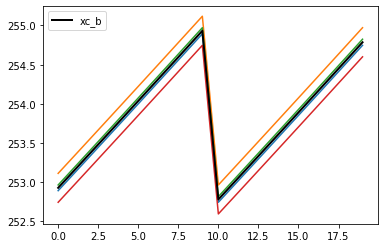

In [37]:
plt.plot(ERA_map.xv_b[:20, 0])
plt.plot(ERA_map.xv_b[:20, 1])
plt.plot(ERA_map.xv_b[:20, 2])
plt.plot(ERA_map.xv_b[:20, 3])
plt.plot(ERA_map.xc_b[:20], label='xc_b', linewidth=2, color='black')
plt.legend()
plt.show()

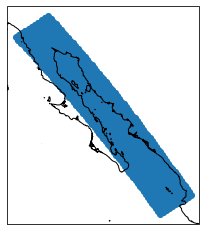

(640, 4)


In [51]:
fig = plt.figure()
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.scatter(ERA_map.xv_b, ERA_map.yv_b, transform=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
plt.show()
print(ERA_map.xv_b.shape)

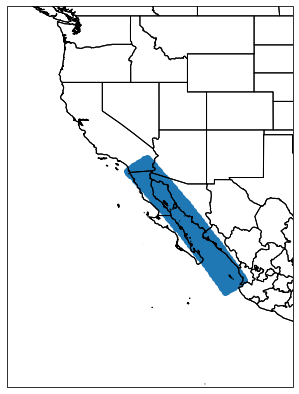

(640,)


In [49]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree())
ax.scatter(ERA_map.xc_b, ERA_map.yc_b, transform=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.STATES.with_scale('10m'))
ax.set_extent([-130, -100, 10, 50], crs=cartopy.crs.PlateCarree())
plt.show()
print(ERA_map.xc_b.shape)

(744, 64)


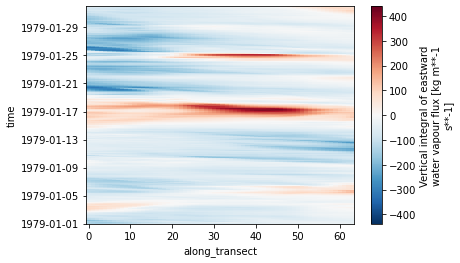

In [41]:
ivt = xa.open_dataarray('origin_data/e5.oper.an.vinteg.viwvt_ncwa.ll025sc.1979010100_1979013123_transect.nc')
print(ivt.shape)
ivt.plot()

In [15]:
print(ERA_map.variables)

Frozen({'src_grid_dims': <xarray.Variable (src_grid_rank: 2)>
array([1440,  721], dtype=int32)
Attributes:
    name0:    lon
    name1:    lat, 'dst_grid_dims': <xarray.Variable (dst_grid_rank: 2)>
array([10, 64], dtype=int32)
Attributes:
    name0:    perp_transect
    name1:    along_transect, 'yc_a': <xarray.Variable (n_a: 1038240)>
[1038240 values with dtype=float64]
Attributes:
    units:    degrees, 'yc_b': <xarray.Variable (n_b: 640)>
array([19.980719, 20.11976 , 20.258526, ..., 33.787087, 33.940379, 34.093213])
Attributes:
    units:    degrees, 'xc_a': <xarray.Variable (n_a: 1038240)>
[1038240 values with dtype=float64]
Attributes:
    units:    degrees, 'xc_b': <xarray.Variable (n_b: 640)>
array([252.928528, 253.149581, 253.371026, ..., 244.183237, 244.420926,
       244.659471])
Attributes:
    units:    degrees, 'yv_a': <xarray.Variable (n_a: 1038240, nv_a: 4)>
[4152960 values with dtype=float64]
Attributes:
    units:    degrees, 'yv_b': <xarray.Variable (n_b: 640, nv_b: 4

In [80]:
import pandas as pd
lat = ERA_map.yc_b.data.reshape(-1, 1)
lon = ERA_map.xc_b.data.reshape(-1, 1)
print(lat.shape, ' ', lon.shape)
latlon = np.concatenate((lat, lon-360), axis=1)
transect = pd.DataFrame(latlon)
print(transect)
transect.to_csv('transect_grids.csv')

(640, 1)   (640, 1)
             0           1
0    19.980719 -107.071472
1    20.119760 -106.850419
2    20.258526 -106.628974
3    20.397013 -106.407133
4    20.535218 -106.184894
..         ...         ...
635  33.479144 -116.289595
636  33.633340 -116.053602
637  33.787087 -115.816763
638  33.940379 -115.579074
639  34.093213 -115.340529

[640 rows x 2 columns]


In [5]:
trans = xa.open_dataset('gulftrans.g')
print(trans)

<xarray.Dataset>
Dimensions:     (four: 4, num_att_in_blk1: 1, num_dim: 3, num_el_blk: 1, num_el_in_blk1: 640, num_nod_per_el1: 4, num_nodes: 715, num_qa_rec: 1, time_step: 0)
Dimensions without coordinates: four, num_att_in_blk1, num_dim, num_el_blk, num_el_in_blk1, num_nod_per_el1, num_nodes, num_qa_rec, time_step
Data variables:
    time_whole  (time_step) float64 ...
    qa_records  (num_qa_rec, four) |S33 ...
    coor_names  (num_dim) |S33 ...
    eb_names    (num_el_blk) |S33 ...
    eb_status   (num_el_blk) int32 ...
    eb_prop1    (num_el_blk) int32 ...
    attrib1     (num_el_in_blk1, num_att_in_blk1) float64 ...
    connect1    (num_el_in_blk1, num_nod_per_el1) int32 ...
    global_id1  (num_el_in_blk1) int32 ...
    edge_type1  (num_el_in_blk1, num_nod_per_el1) int32 ...
    coord       (num_dim, num_nodes) float64 ...
Attributes:
    api_version:               5.0
    version:                   5.0
    floating_point_word_size:  8
    file_size:                 0
    title

In [25]:
print(trans.variables)

Frozen({'time_whole': <xarray.Variable (time_step: 0)>
array([], dtype=float64), 'qa_records': <xarray.Variable (num_qa_rec: 1, four: 4)>
array([[b'Tempest', b'14.0', b'02/27/2020', b'22:48:21']], dtype='|S33'), 'coor_names': <xarray.Variable (num_dim: 3)>
array([b'x', b'y', b'z'], dtype='|S33'), 'eb_names': <xarray.Variable (num_el_blk: 1)>
array([b''], dtype='|S33'), 'eb_status': <xarray.Variable (num_el_blk: 1)>
array([1], dtype=int32), 'eb_prop1': <xarray.Variable (num_el_blk: 1)>
array([1], dtype=int32)
Attributes:
    name:     ID, 'attrib1': <xarray.Variable (num_el_in_blk1: 640, num_att_in_blk1: 1)>
array([[9.96921e+36],
       [9.96921e+36],
       [9.96921e+36],
       ...,
       [9.96921e+36],
       [9.96921e+36],
       [9.96921e+36]]), 'connect1': <xarray.Variable (num_el_in_blk1: 640, num_nod_per_el1: 4)>
array([[  1,   2,  13,  12],
       [  2,   3,  14,  13],
       [  3,   4,  15,  14],
       ...,
       [701, 702, 713, 712],
       [702, 703, 714, 713],
       [70

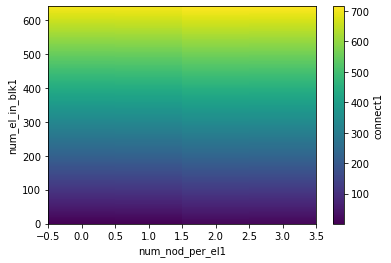

In [42]:
trans.connect1.plot()

In [55]:
import numpy as np
np.unique(trans.edge_type1)

array([0], dtype=int32)

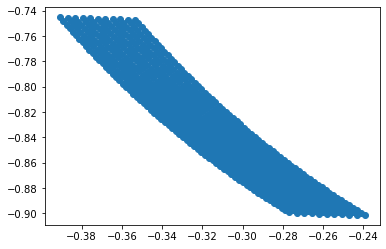

In [56]:
plt.scatter(trans.coord[0,:], trans.coord[1,:])

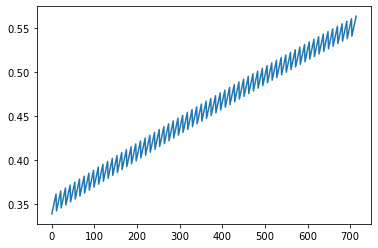

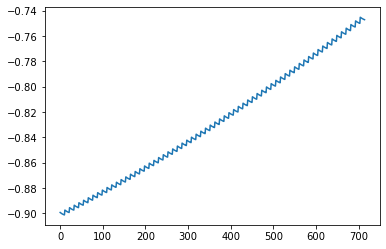

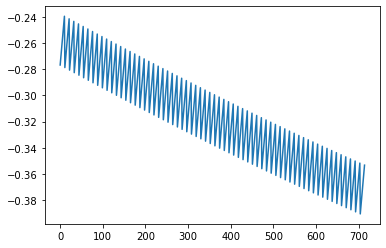

In [72]:
plt.plot(trans.coord[2,:])
plt.show()
plt.plot(trans.coord[1,:])
plt.show()
plt.plot(trans.coord[0,:])
plt.show()

In [73]:
r = 6371
latitude = np.rad2deg(np.arcsin(trans.coord[2,:]/r))


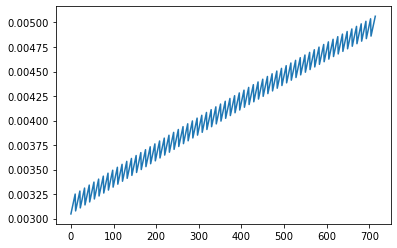

In [74]:
plt.plot(latitude)